In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [285]:
#df

In [5]:
# read the data:
df = pd.read_csv("C:/Users/priya/Downloads/Customer_Dataset_File.csv")
df.head(5)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [6]:

df = df.dropna()

In [7]:
df.dtypes

CustomerID              object
Region                   int64
TownSize                object
Gender                  object
Age                      int64
EducationYears           int64
JobCategory             object
UnionMember             object
EmploymentLength         int64
Retired                 object
HHIncome                object
DebtToIncomeRatio      float64
CreditDebt             float64
OtherDebt              float64
LoanDefault             object
MaritalStatus           object
HouseholdSize          float64
NumberPets             float64
NumberCats             float64
NumberDogs             float64
NumberBirds            float64
HomeOwner              float64
CarsOwned                int64
CarOwnership            object
CarBrand                object
CarValue                object
CommuteTime             object
PoliticalPartyMem       object
Votes                   object
CreditCard              object
CardTenure               int64
CardItemsMonthly         int64
CardSpen

In [8]:
#df['Region'] = pd.to_numeric(df['Region'])
#df['TownSize'] = pd.to_numeric(df['TownSize'])


In [9]:
#df.dtypes

In [10]:
#num_names = list(df.select_dtypes(exclude = ['object']).columns)

In [11]:
#df.dtypes.unique

In [12]:
#df.isnull().any()
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [13]:
sp =  SimpleImputer(strategy='most_frequent')
sp2 =  SimpleImputer(strategy='median')

In [14]:
ct = ColumnTransformer([('sp',sp,make_column_selector(dtype_include=['O','object','string'])),('sp2',sp2,make_column_selector(dtype_include=['int32','float16','int16','float32','int64','float64']))])


In [15]:
ctn = ct.fit_transform(df)

In [16]:
len(ctn[0])

59

In [17]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber'],
      dtype='obje

In [18]:
ctn_df = pd.DataFrame(ctn, columns = df.columns)

In [19]:
ctn_df

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,2,Female,Professional,Yes,No,"$31,000.00",Yes,Unmarried,Own,...,0,0,0,0,0,2,2,5,5,13
1,0648-AIPJSP-UVM,5,Male,Sales,No,No,"$15,000.00",Yes,Unmarried,Own,...,6,0,0,0,1,2,4,5,39,18
2,5195-TLUDJE-HVO,4,Female,Sales,No,No,"$35,000.00",No,Married,Own,...,3,2,1,0,1,3,35,9,65,21
3,4459-VLPQUH-3OL,3,Male,Sales,No,No,"$20,000.00",Yes,Married,Own,...,0,0,0,0,1,3,5,17,36,26
4,8158-SMTQFB-CNO,2,Male,Sales,No,No,"$23,000.00",No,Married,Lease,...,0,0,0,0,0,1,8,8,21,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,3675-GZFGOT-QJN,2,Male,Professional,No,No,"$196,000.00",No,Unmarried,Own,...,4,4,0,0,1,1,35,11,69,19
4889,4699-LEPCCE-3UD,3,Male,Professional,No,No,"$83,000.00",Yes,Unmarried,Own,...,1,0,0,0,1,2,15,6,30,14
4890,8485-LLUICH-CVV,5,Male,Professional,No,No,"$108,000.00",No,Unmarried,Own,...,0,0,0,0,1,3,40,11,72,16
4891,9325-URAAUT-7FA,1,Male,Sales,No,No,"$189,000.00",Yes,Married,Own,...,0,0,0,0,1,2,22,9,37,24


In [20]:
#df.isnull().any()

In [21]:
df.head(1)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No


In [22]:
ctn_df.head(1)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,2,Female,Professional,Yes,No,"$31,000.00",Yes,Unmarried,Own,...,0,0,0,0,0,2,2,5,5,13


In [23]:
# information about columns:
#df.info()
#df.describe()
ctn_df1 = ctn_df.convert_dtypes()

In [24]:
#ctn_df1.dtypes
from sklearn.feature_extraction import DictVectorizer

In [25]:
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix


# turn X into dict
X_dict = df.to_dict(orient='records') # turn each row as key-value pairs
# show X_dict
#X_dict










In [26]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
# show X_encoded





In [27]:
X_encoded

array([[ 1.,  0., 20., ...,  1.,  1.,  0.],
       [ 0.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 67., ...,  0.,  1.,  0.],
       ...,
       [ 1.,  0., 75., ...,  0.,  1.,  0.],
       [ 1.,  0., 47., ...,  0.,  1.,  0.],
       [ 0.,  1., 41., ...,  1.,  1.,  0.]])

In [28]:
# vocabulary
vocab = dv_X.vocabulary_
# show vocab


In [29]:
key = vocab.keys()
key = list(key)


In [30]:
X_encoded_df = pd.DataFrame(X_encoded, columns =key)


In [31]:
X_encoded_df.shape

(4893, 20386)

In [32]:


scaler = StandardScaler()

scaler.fit(X_encoded_df)


X_encoded_scaled = scaler.transform(X_encoded_df)

X_encoded_scaled = pd.DataFrame(X_encoded_scaled,columns= X_encoded_df.columns)





In [33]:
X_encoded_scaled.shape

(4893, 20386)

In [34]:
#X_encoded_df

In [35]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(0.90)
X_var = var.fit(X_encoded_df)


X_var_trans = X_var.transform(X_encoded_df)




In [36]:
len(X_var_trans[1])

14

In [37]:
data_transformed = X_encoded_df.loc[:, X_var.get_support()]


In [38]:
data_transformed.columns

Index(['TownSize=2', 'VoiceLastMonth= $23.40 ', 'CardSpendMonth= $4,152.50 ',
       'VoiceOverTenure= $16.45 ', 'CustomerID=2435-RABMIV-T9Y',
       'CustomerID=1021-BKWCOZ-SLE', 'CustomerID=0620-EOJBKD-U7E',
       'CardSpendMonth= $2,312.80 ', 'CustomerID=7827-HPIBMK-T13',
       'CardSpendMonth= $3,632.50 ', 'VoiceLastMonth= $134.85 ',
       'VoiceOverTenure= $125.00 ', 'DataOverTenure= $719.55 ',
       'VoiceOverTenure= $650.75 '],
      dtype='object')

In [39]:
#df = ctn_df1

In [51]:
#num_names

In [680]:
cat_names = list(df.select_dtypes(include= ['string']))

In [681]:
len(cat_names)

0

In [52]:
#PCA to get the components that explain maximum variance:

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

In [53]:
from sklearn.preprocessing import MinMaxScaler
#StandardScaler

In [59]:
sca = Normalizer()

df_t =  sca.fit_transform(X_encoded_df)

In [60]:
len(df_t[0])

20386

In [64]:
pca = PCA(n_components = 25)
pca.fit(df_t)

PCA(n_components=25)

In [65]:
exp = pca.explained_variance_ratio_.cumsum()

In [66]:
exp

array([0.49950623, 0.68891548, 0.76779235, 0.81399267, 0.84400372,
       0.86762602, 0.88955656, 0.90947074, 0.92480627, 0.93475294,
       0.94038768, 0.9454595 , 0.95004583, 0.9541152 , 0.95769455,
       0.96064096, 0.96199924, 0.96312023, 0.96417332, 0.9651632 ,
       0.96612541, 0.96702249, 0.96787541, 0.96870353, 0.96949337])

In [480]:

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',True)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.precision', 100)

In [481]:
exp = pd.DataFrame(exp)

##### exp.tail(100)

In [487]:
#exp.head(100)

,0
0,0.000906249004420045848294529289290721862926147878170013427734375
1,0.001510387199331556656867192600657290313392877578735351562500000
2,0.002024943548726464408876735134867885790299624204635620117187500
3,0.002468725185964534742794063149062822049017995595932006835937500
4,0.002907868017168312863018897473921242635697126388549804687500000
5,0.003343910711381630103400386389012055587954819202423095703125000
6,0.003773269832362058720520714416579721728339791297912597656250000
7,0.004197848195751569151668025625667723943479359149932861328125000
8,0.004620749574806000056770294293073675362393260002136230468750000
9,0.005038460954418324568016007702908609644509851932525634765625000


In [457]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3])

In [91]:
# cummulative variance - to choose the number of components that explains more than 75% variance:

print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

[ 14.45  27.09  34.23  40.48  44.97  49.04  52.66  56.16  59.58  62.92
  66.2   69.47  72.64  75.77  78.66  80.96  83.13  85.23  87.11  88.91
  90.52  91.88  93.19  94.47  95.71  96.87  97.98  99.07  99.76 100.  ]


In [67]:
final_pca = PCA(n_components = 25).fit(df_t)


In [68]:
final_pca.explained_variance_ratio_.cumsum()

array([0.49950623, 0.68891548, 0.76779235, 0.81399267, 0.84400372,
       0.86762602, 0.88955656, 0.90947074, 0.92480627, 0.93475294,
       0.94038768, 0.9454595 , 0.95004583, 0.9541152 , 0.95769455,
       0.96064096, 0.96199924, 0.96312023, 0.96417332, 0.9651632 ,
       0.9661254 , 0.96702224, 0.96787501, 0.96870308, 0.9694928 ])

In [69]:
x = final_pca.transform(df_t)

In [70]:
len(x[0])

25

In [209]:
pp = pd.DataFrame(final_pca.components_)

In [218]:
ff = np.transpose(final_pca.components_)

In [227]:
#x

In [226]:
#ff

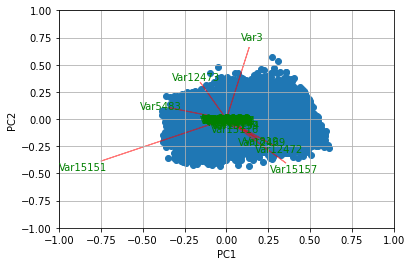

In [217]:
 

#pca1 = PCA()
#x_new = pca1.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


In [71]:
pp = pd.DataFrame(final_pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])







# Dump components relations with features:
#print(pd.DataFrame(final_pca.components_,columns=df.columns,index = ['PC-1','PC-2']))


#final_pca.get_params

#print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))


In [72]:
final_load =  pd.DataFrame((final_pca.components_.T * np.sqrt(final_pca.explained_variance_)).T,columns=X_encoded_df.columns).T

In [73]:
final_load



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CustomerID=3964-QJWTRG-NPN,0.001064,0.000291,-0.000315,0.000169,-0.000026,-9.932230e-05,-1.332193e-04,1.544332e-04,0.000056,-1.123980e-04,...,-0.000032,1.037347e-04,-0.000090,1.865540e-03,-0.001741,6.187696e-03,2.128280e-03,0.002261,0.002152,-1.671457e-05
Region,0.003513,-0.002527,-0.000309,0.000396,0.000804,-6.025950e-05,1.895532e-04,-9.716520e-05,-0.000735,-1.362656e-06,...,0.000496,-4.050064e-05,0.000106,-1.940352e-03,0.001959,-6.410681e-03,-2.268604e-03,-0.002258,-0.001838,2.199002e-04
TownSize=2,0.034903,0.104028,-0.011259,0.018359,-0.019484,-4.401914e-03,-1.545968e-04,6.035866e-04,0.007084,-2.124887e-02,...,0.000046,8.073463e-06,-0.000005,-7.014760e-05,0.000125,-1.961965e-04,6.102939e-05,0.000024,0.000064,-2.410655e-05
Gender=Female,0.002477,-0.001304,-0.000542,0.000498,0.000041,-4.231575e-04,6.513409e-04,-4.886045e-04,-0.000879,6.602451e-05,...,-0.003902,1.346424e-04,0.000453,2.522386e-04,-0.000076,3.769839e-04,3.446626e-04,-0.000003,-0.001136,5.257098e-04
Age,0.002099,-0.000932,-0.000082,0.000068,0.000737,2.635757e-04,-5.950070e-04,5.458725e-04,0.000200,-1.797851e-04,...,0.004366,-7.140828e-05,-0.000438,-3.270506e-04,0.000294,-5.999681e-04,-4.849871e-04,0.000006,0.001450,-3.225241e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VoiceOverTenure= $282.70,-0.000002,0.000002,-0.000001,-0.000001,0.000003,2.327343e-07,4.738043e-07,-5.229999e-07,-0.000002,-4.431044e-07,...,-0.000001,-5.359397e-07,-0.000001,3.721319e-07,0.000001,9.997083e-07,-4.195300e-07,0.000001,-0.000001,-3.687142e-07
"EquipmentOverTenure= $1,032.85",0.002366,-0.001386,-0.000383,0.000121,0.000024,-4.918152e-04,3.717497e-04,-6.869918e-04,-0.000430,2.905224e-04,...,0.000384,3.069456e-04,-0.002991,4.737808e-03,0.002973,-2.374132e-03,9.088063e-04,0.004056,-0.000494,1.859244e-04
CustomerID=8027-EXDZBF-OGR,0.002210,-0.000850,-0.000241,0.000445,0.000755,3.322334e-04,-3.154158e-04,7.442598e-04,-0.000249,-4.042830e-04,...,0.000080,-2.437115e-04,0.003006,-4.812620e-03,-0.002755,2.151148e-03,-1.049131e-03,-0.004053,0.000807,1.726124e-05
"CardSpendMonth= $2,697.20",0.003095,-0.001274,-0.000453,-0.000227,-0.000131,-1.656019e-03,9.879987e-04,-1.236390e-03,-0.000656,7.614940e-04,...,0.000506,-2.375362e-04,-0.000084,-3.791558e-04,0.000358,-6.286538e-04,-1.870332e-04,0.000140,0.002650,-1.511936e-03


In [106]:
#based on the above matrix, we can see, Calling card,Wireless data,VM,Pager,CallerID,CallWait,CallForward,ThreeWaycalling,Other debt is having maximum coefficients in PCA1
'''l = ['CallingCard','WirelessData','Multiline','VM','Pager','Internet','CallerID','CallForward','ThreeWayCalling','OtherDebt']
final_df = df_scaled[l]
print(final_df)

'''

"l = ['CallingCard','WirelessData','Multiline','VM','Pager','Internet','CallerID','CallForward','ThreeWayCalling','OtherDebt']\nfinal_df = df_scaled[l]\nprint(final_df)\n\n"

In [685]:
len(x[0])

15

In [ ]:
telco.cluster_5.value_counts()/sum(telco.cluster_5.value_counts())

In [110]:
telco.columns

Index(['Region', 'Age', 'EducationYears', 'EmploymentLength',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'HouseholdSize',
       'NumberPets', 'NumberCats', 'NumberDogs', 'NumberBirds', 'HomeOwner',
       'CarsOwned', 'CardTenure', 'CardItemsMonthly', 'PhoneCoTenure',
       'TVWatchingHours', 'CustomerID', 'Gender', 'JobCategory', 'CallingCard',
       'WirelessData', 'Multiline', 'VM', 'Pager', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'clusters'],
      dtype='object')

In [74]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

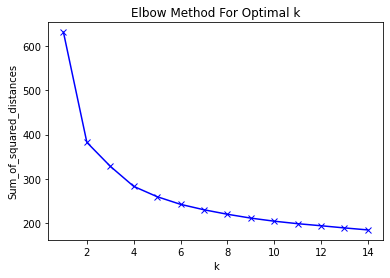

In [75]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [233]:
km=KMeans(n_clusters=4)
km.fit(x)


KMeans(n_clusters=4)

In [234]:
km

KMeans(n_clusters=4)

In [235]:
l1 = list(km.labels_)

In [236]:
#l1
#X_encoded_df

In [237]:
len(x)

4893

In [238]:
# get the cluster labels for each row
df['clusters'] = km.labels_
    


In [239]:
#ctn_df1.isnull().any()

In [240]:
km.inertia_

282.9111025198625

In [241]:
#telco.dtypes
#df.drop('clusters',axis=1)

In [242]:
#ctn_df['clusters'] = km.labels_


In [243]:
sor_df =  df.sort_values(by=['clusters'])


In [244]:
sor_df['clusters'].tail()


280     3
2119    3
2117    3
144     3
2210    3
Name: clusters, dtype: int32

In [245]:
len(sor_df.columns)

60

In [246]:
import seaborn as sns

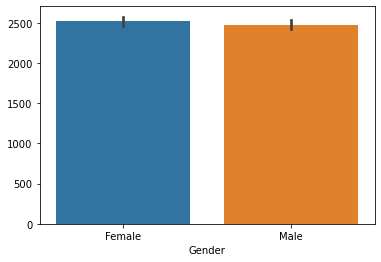

In [247]:
#a=table(sor_df['Gender'])
sns.barplot(x= sor_df['Gender'],y=sor_df.index)

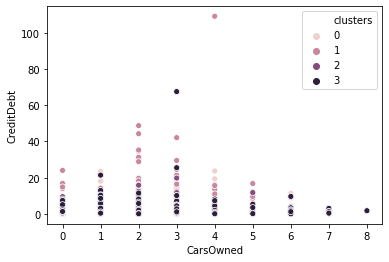

In [248]:
import seaborn as sns
sns.scatterplot(x=sor_df['CarsOwned'], y=sor_df['CreditDebt'], hue=sor_df['clusters'])

In [249]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'clusters'],
     

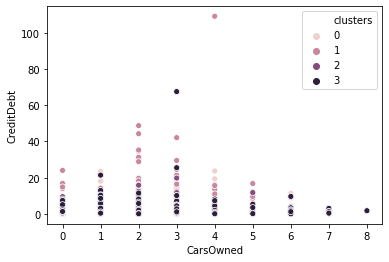

In [250]:
sns.scatterplot(x=sor_df['CarsOwned'], y=sor_df['CreditDebt'], hue=sor_df['clusters'])

In [251]:
x_df = pd.DataFrame(x)

In [252]:
df

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber,clusters
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,No,13,No,Yes,Yes,No,No,2
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes,3
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,21,No,No,No,No,Yes,1
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,Yes,26,Yes,Yes,Yes,No,Yes,3
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,No,27,Yes,No,Yes,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2,Male,68,10,Professional,No,24,No,...,No,No,No,19,No,No,No,No,Yes,1
4996,4699-LEPCCE-3UD,3,3,Male,51,14,Professional,No,6,No,...,Yes,Yes,No,14,No,No,No,No,No,0
4997,8485-LLUICH-CVV,4,5,Male,75,17,Professional,No,24,No,...,Yes,Yes,No,16,No,No,No,No,Yes,1
4998,9325-URAAUT-7FA,1,1,Male,47,19,Sales,No,3,No,...,No,No,Yes,24,Yes,Yes,Yes,No,Yes,3


In [253]:
x_df[0]

0       0.448087
1      -0.079714
2      -0.244247
3      -0.002271
4       0.145834
          ...   
4888   -0.283615
4889   -0.000605
4890   -0.270018
4891   -0.029593
4892   -0.024166
Name: 0, Length: 4893, dtype: float64

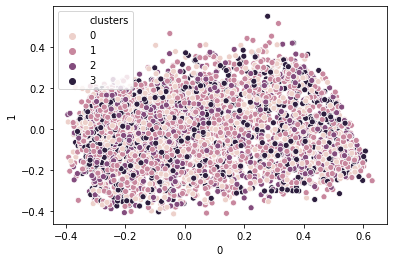

In [254]:
sns.scatterplot(x=x_df[0], y=x_df[1], hue=df['clusters'])

In [255]:
x_df.iloc[:,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.448087,-0.080825,0.118659,0.068852,-0.014515,0.052094,-0.075877,0.073415,-0.100803,0.009138
1,-0.079714,-0.352385,0.135524,0.072741,-0.041121,-0.005757,0.120558,0.099601,-0.075732,-0.008132
2,-0.244247,0.060995,-0.009459,-0.004338,-0.031402,0.020411,-0.016381,-0.037695,-0.021209,0.012204
3,-0.002271,-0.361800,-0.124475,0.001848,0.044436,-0.114836,-0.017174,0.017710,0.032208,0.004197
4,0.145834,-0.195678,-0.210727,-0.073213,-0.058981,0.030401,-0.077673,0.036215,-0.016219,-0.001655
...,...,...,...,...,...,...,...,...,...,...
4888,-0.283615,0.090569,0.019691,-0.055744,0.023496,0.011227,-0.004085,-0.014087,0.035826,0.023922
4889,-0.000605,0.126269,0.119623,0.064280,-0.065104,0.025040,-0.039144,0.033953,0.042030,-0.021510
4890,-0.270018,0.106271,0.033907,-0.005765,0.030246,0.020251,-0.051251,-0.008320,-0.009425,0.017442
4891,-0.029593,-0.034725,0.044999,0.011722,-0.048379,0.104894,-0.130983,0.030860,0.105231,-0.007541


In [256]:
x_df1 = x_df.copy()

In [257]:
x_df1['clusters'] = km.labels_

In [258]:
x_df1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,clusters
0,0.448087,-0.080825,0.118659,0.068852,-0.014515,0.052094,-0.075877,0.073415,-0.100803,0.009138,...,-0.011964,0.003081,-0.015015,-0.036450,-0.003200,0.030927,0.009109,0.023477,-0.038646,2
1,-0.079714,-0.352385,0.135524,0.072741,-0.041121,-0.005757,0.120558,0.099601,-0.075732,-0.008132,...,-0.006114,-0.005336,-0.012288,0.008101,-0.004013,-0.006106,0.021970,-0.024642,-0.001490,3
2,-0.244247,0.060995,-0.009459,-0.004338,-0.031402,0.020411,-0.016381,-0.037695,-0.021209,0.012204,...,0.011615,0.006121,0.009310,-0.010012,-0.000196,-0.000728,0.010282,-0.007140,-0.002685,1
3,-0.002271,-0.361800,-0.124475,0.001848,0.044436,-0.114836,-0.017174,0.017710,0.032208,0.004197,...,-0.004139,-0.007890,-0.001180,0.021161,0.002490,-0.009828,0.005766,-0.005924,0.006896,3
4,0.145834,-0.195678,-0.210727,-0.073213,-0.058981,0.030401,-0.077673,0.036215,-0.016219,-0.001655,...,-0.004819,-0.008930,0.002220,0.021062,0.000501,-0.015814,0.005459,-0.011483,0.019565,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,-0.283615,0.090569,0.019691,-0.055744,0.023496,0.011227,-0.004085,-0.014087,0.035826,0.023922,...,0.031763,0.006857,0.000954,0.004493,0.004151,0.005151,-0.006277,0.000484,0.001271,1
4889,-0.000605,0.126269,0.119623,0.064280,-0.065104,0.025040,-0.039144,0.033953,0.042030,-0.021510,...,-0.002000,-0.008650,-0.000296,0.016913,-0.006576,-0.009192,0.003942,-0.016012,-0.003417,0
4890,-0.270018,0.106271,0.033907,-0.005765,0.030246,0.020251,-0.051251,-0.008320,-0.009425,0.017442,...,-0.001965,-0.005071,0.002413,0.007502,0.002350,0.008288,0.000931,0.001010,-0.006111,1
4891,-0.029593,-0.034725,0.044999,0.011722,-0.048379,0.104894,-0.130983,0.030860,0.105231,-0.007541,...,-0.004825,0.000082,-0.004258,0.009244,0.001346,0.002942,0.021871,0.006478,-0.011062,3


In [259]:
l = x_df1['clusters']

In [260]:
df['clusters'].isnull().sum()

0

In [261]:
#x_df1.isnull().sum()
x_df1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,clusters
0,0.448087,-0.080825,0.118659,0.068852,-0.014515,0.052094,-0.075877,0.073415,-0.100803,0.009138,...,-0.011964,0.003081,-0.015015,-0.036450,-0.003200,0.030927,0.009109,0.023477,-0.038646,2
1,-0.079714,-0.352385,0.135524,0.072741,-0.041121,-0.005757,0.120558,0.099601,-0.075732,-0.008132,...,-0.006114,-0.005336,-0.012288,0.008101,-0.004013,-0.006106,0.021970,-0.024642,-0.001490,3
2,-0.244247,0.060995,-0.009459,-0.004338,-0.031402,0.020411,-0.016381,-0.037695,-0.021209,0.012204,...,0.011615,0.006121,0.009310,-0.010012,-0.000196,-0.000728,0.010282,-0.007140,-0.002685,1
3,-0.002271,-0.361800,-0.124475,0.001848,0.044436,-0.114836,-0.017174,0.017710,0.032208,0.004197,...,-0.004139,-0.007890,-0.001180,0.021161,0.002490,-0.009828,0.005766,-0.005924,0.006896,3
4,0.145834,-0.195678,-0.210727,-0.073213,-0.058981,0.030401,-0.077673,0.036215,-0.016219,-0.001655,...,-0.004819,-0.008930,0.002220,0.021062,0.000501,-0.015814,0.005459,-0.011483,0.019565,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,-0.283615,0.090569,0.019691,-0.055744,0.023496,0.011227,-0.004085,-0.014087,0.035826,0.023922,...,0.031763,0.006857,0.000954,0.004493,0.004151,0.005151,-0.006277,0.000484,0.001271,1
4889,-0.000605,0.126269,0.119623,0.064280,-0.065104,0.025040,-0.039144,0.033953,0.042030,-0.021510,...,-0.002000,-0.008650,-0.000296,0.016913,-0.006576,-0.009192,0.003942,-0.016012,-0.003417,0
4890,-0.270018,0.106271,0.033907,-0.005765,0.030246,0.020251,-0.051251,-0.008320,-0.009425,0.017442,...,-0.001965,-0.005071,0.002413,0.007502,0.002350,0.008288,0.000931,0.001010,-0.006111,1
4891,-0.029593,-0.034725,0.044999,0.011722,-0.048379,0.104894,-0.130983,0.030860,0.105231,-0.007541,...,-0.004825,0.000082,-0.004258,0.009244,0.001346,0.002942,0.021871,0.006478,-0.011062,3


In [262]:
df[['CarsOwned', 'CreditDebt','clusters']].isnull().any()

CarsOwned     False
CreditDebt    False
clusters      False
dtype: bool

In [263]:
sns.pairplot(data = x_df1, hue ='clusters',  kind='scatter')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E2AF576D30> (for post_execute):


KeyboardInterrupt: 

In [264]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'clusters'],
     

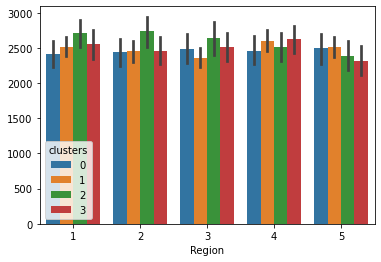

In [265]:
sns.barplot(x= df['Region'], y= df.index,hue=df['clusters'])

In [266]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'clusters'],
     

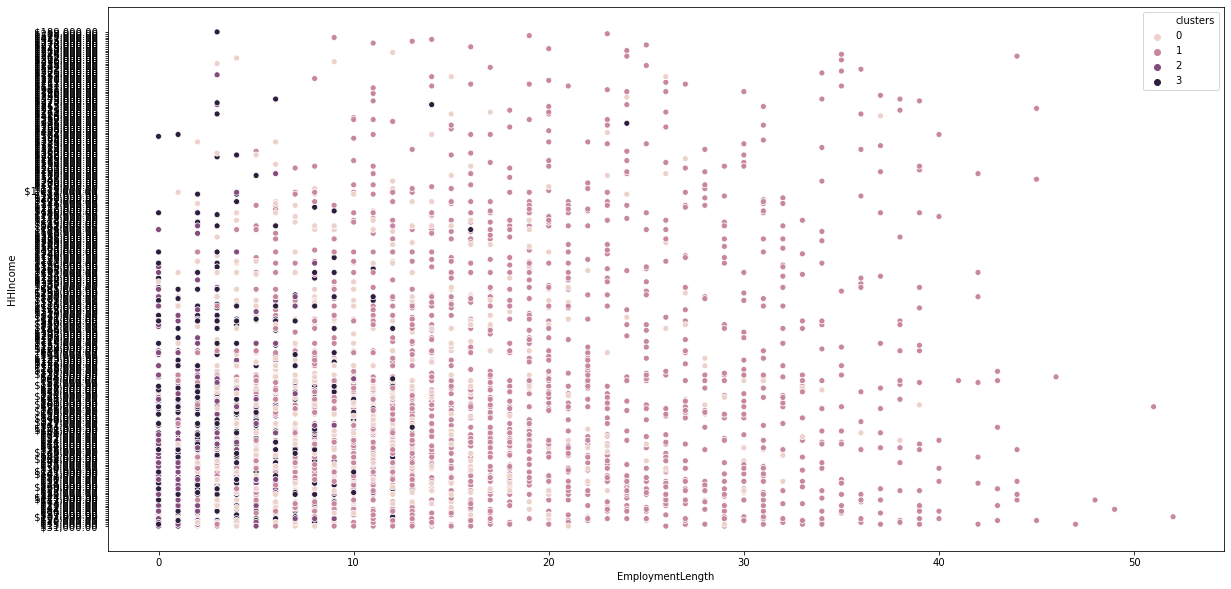

In [267]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

sns.scatterplot(x= df['EmploymentLength'], y=df['HHIncome'], hue=df['clusters'])

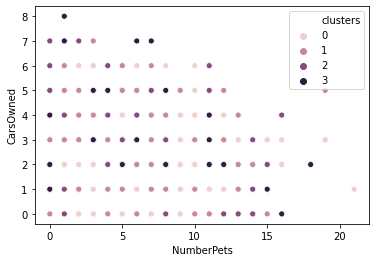

In [268]:
sns.scatterplot(x= df['NumberPets'], y=df['CarsOwned'], hue=df['clusters'])

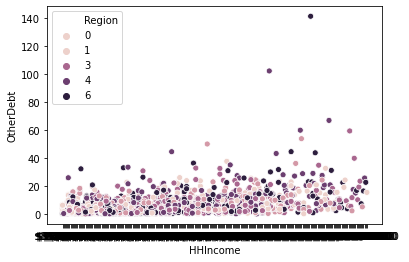

In [269]:
sns.scatterplot(x= df['HHIncome'], y=df['OtherDebt'], hue=df['Region'])

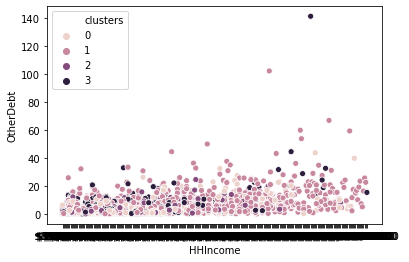

In [270]:
sns.scatterplot(x= df['HHIncome'], y=df['OtherDebt'], hue=df['clusters'])

In [271]:
df['TVWatchingHours']

0       13
1       18
2       21
3       26
4       27
        ..
4995    19
4996    14
4997    16
4998    24
4999    19
Name: TVWatchingHours, Length: 4893, dtype: int64

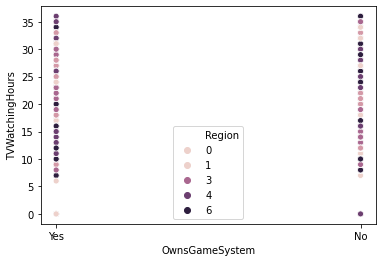

In [272]:
#TVWatchingHours

sns.scatterplot(x= df['OwnsGameSystem'], y= df['TVWatchingHours'] , hue=df['Region'])

In [273]:
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'clusters'],
     

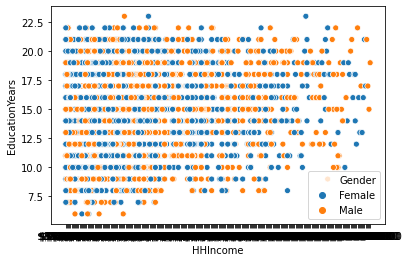

In [274]:
sns.scatterplot(x= df['HHIncome'], y=df['EducationYears'], hue=df['Gender'])

#sns.barplot(x= df['Region'], y=x_df['CallWait'], hue=df['clusters'])

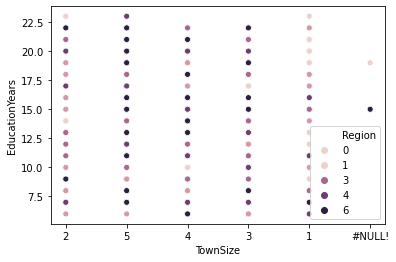

In [275]:

sns.scatterplot(x= df['TownSize'], y=df['EducationYears'], hue=df['Region'])

#for i in range(1,len(x_df.columns)-1):
#    sns.scatterplot(x=x_df[i], y=x_df[i+1], hue=sor_df['clusters'])
    

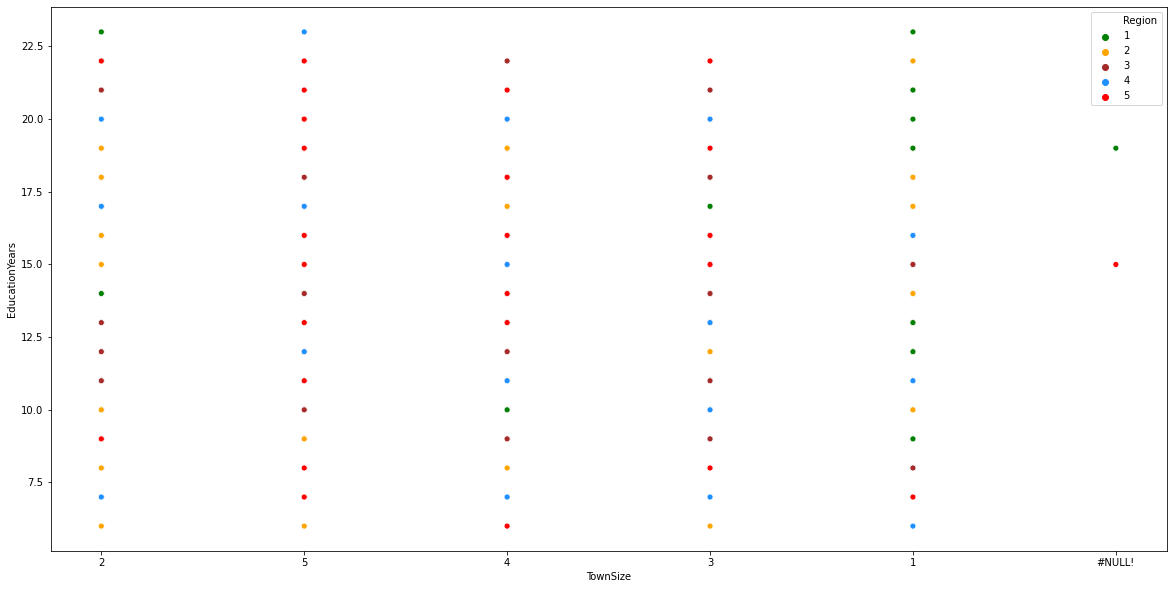

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.scatterplot(x= df['TownSize'], y=df['EducationYears'], hue=df['Region'], palette=['green','orange','brown','dodgerblue','red'])


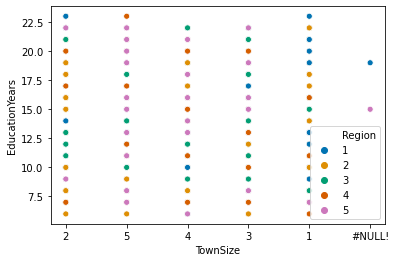

In [277]:
sns.scatterplot(x= df['TownSize'], y=df['EducationYears'], hue=df['Region'], palette='colorblind')


In [278]:
#sns.barplot(x= df['CardSpendMonth'], hue=df['ActiveLifestyle'], palette='colorblind')
from sklearn.manifold import TSNE


In [279]:
#T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42)


In [281]:
X_reduced_tsne1 = X_reduced_tsne.fit_transform(df_t[:1000])


In [ ]:
#X_reduced_tsne1= X_reduced_tsne.transform(df_t)

df_t

In [ ]:
X_reduced_tsne1

"\n# PCA scatter plot\nax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y11 == 0), cmap='coolwarm', label='No Fraud', linewidths=2)\nax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y11 == 1), cmap='coolwarm', label='Fraud', linewidths=2)\nax2.set_title('PCA', fontsize=14)\n\nax2.grid(True)\n\nax2.legend(handles=[blue_patch, red_patch])\n"

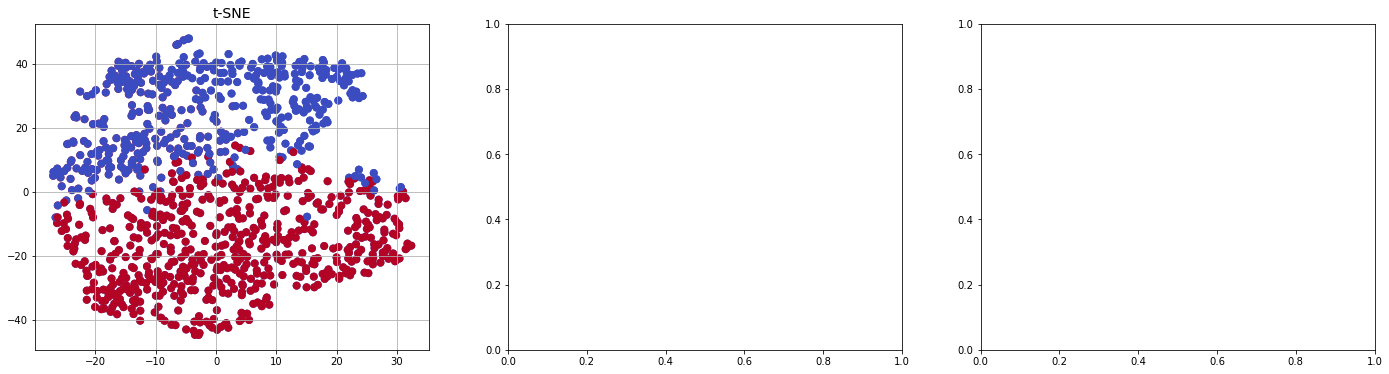

In [127]:


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
#labels = ['No Fraud', 'Fraud']
#blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
#red_patch = mpatches.Patch(color='#AF0000', label='Fraud')



#f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


#blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
#red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne1[:,0], X_reduced_tsne1[:,1], c=(df['clusters'][:1000] == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne1[:,0], X_reduced_tsne1[:,1], c=(df['clusters'][:1000] == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

#ax1.legend(handles=[blue_patch, red_patch])
'''
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y11 == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y11 == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])
'''

In [295]:
x_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.448087,-0.080825,0.118659,0.068852,-0.014515,0.052094,-0.075877,0.073415,-0.100803,0.009138,...,0.023563,-0.011964,0.003081,-0.015015,-0.036450,-0.003200,0.030927,0.009109,0.023477,-0.038646
1,-0.079714,-0.352385,0.135524,0.072741,-0.041121,-0.005757,0.120558,0.099601,-0.075732,-0.008132,...,-0.012935,-0.006114,-0.005336,-0.012288,0.008101,-0.004013,-0.006106,0.021970,-0.024642,-0.001490
2,-0.244247,0.060995,-0.009459,-0.004338,-0.031402,0.020411,-0.016381,-0.037695,-0.021209,0.012204,...,-0.005123,0.011615,0.006121,0.009310,-0.010012,-0.000196,-0.000728,0.010282,-0.007140,-0.002685
3,-0.002271,-0.361800,-0.124475,0.001848,0.044436,-0.114836,-0.017174,0.017710,0.032208,0.004197,...,-0.032706,-0.004139,-0.007890,-0.001180,0.021161,0.002490,-0.009828,0.005766,-0.005924,0.006896
4,0.145834,-0.195678,-0.210727,-0.073213,-0.058981,0.030401,-0.077673,0.036215,-0.016219,-0.001655,...,0.033459,-0.004819,-0.008930,0.002220,0.021062,0.000501,-0.015814,0.005459,-0.011483,0.019565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,-0.283615,0.090569,0.019691,-0.055744,0.023496,0.011227,-0.004085,-0.014087,0.035826,0.023922,...,0.001244,0.031763,0.006857,0.000954,0.004493,0.004151,0.005151,-0.006277,0.000484,0.001271
4889,-0.000605,0.126269,0.119623,0.064280,-0.065104,0.025040,-0.039144,0.033953,0.042030,-0.021510,...,0.037430,-0.002000,-0.008650,-0.000296,0.016913,-0.006576,-0.009192,0.003942,-0.016012,-0.003417
4890,-0.270018,0.106271,0.033907,-0.005765,0.030246,0.020251,-0.051251,-0.008320,-0.009425,0.017442,...,0.015496,-0.001965,-0.005071,0.002413,0.007502,0.002350,0.008288,0.000931,0.001010,-0.006111
4891,-0.029593,-0.034725,0.044999,0.011722,-0.048379,0.104894,-0.130983,0.030860,0.105231,-0.007541,...,-0.024650,-0.004825,0.000082,-0.004258,0.009244,0.001346,0.002942,0.021871,0.006478,-0.011062


In [298]:
#x_df

df_seg = pd.concat([df.reset_index(drop=True),x_df.iloc[:,:3]],axis=1)
df_seg.columns.values[-3:] = ['component 1','component 2','component 3']

df_seg['segment k-means pca'] = km.labels_

In [300]:
df_seg['segment']= df_seg['segment k-means pca'].map({0:'first',1:'second',2:'third',3:'fourth'})

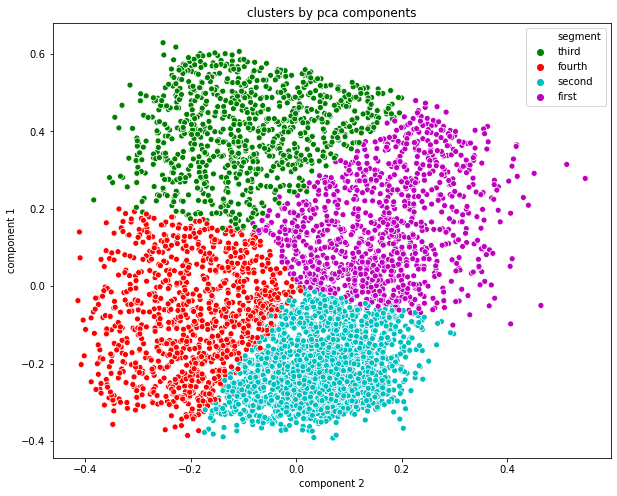

In [303]:
x_axis = df_seg['component 2']
y_axis =  df_seg['component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_seg['segment'],palette=['g','r','c','m'])
plt.title('clusters by pca components')
plt.show()

In [308]:
df_seg_sort = df_seg.sort_values(by='clusters')



#sort_values(by='clusters')

In [312]:
df_1 = df_seg_sort[df_seg_sort['clusters'] ==0]

df_2 = df_seg_sort[df_seg_sort['clusters'] ==1]

df_3 = df_seg_sort[df_seg_sort['clusters'] ==2]

df_4 = df_seg_sort[df_seg_sort['clusters'] ==3]


In [323]:
df_1.describe()

,Region,Age,EducationYears,EmploymentLength,DebtToIncomeRatio,CreditDebt,OtherDebt,HouseholdSize,NumberPets,NumberCats,...,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,clusters,component 1,component 2,component 3,segment k-means pca
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.0,1042.000000,1042.000000,1042.000000,1042.0
mean,2.966411,52.880998,14.432821,9.164107,9.433013,1.797532,3.402347,1.820537,2.959693,0.507678,...,2.095010,9.594050,9.973129,21.581574,18.973129,0.0,0.154268,0.164206,-0.010058,0.0
std,1.408709,13.074649,3.419416,6.840781,6.210105,2.697650,4.087193,1.147792,3.424821,0.839948,...,1.265668,5.142661,3.425234,10.705541,5.788727,0.0,0.131288,0.106094,0.097197,0.0
min,1.000000,18.000000,6.000000,0.000000,0.100000,0.006344,0.049770,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,-0.100660,-0.081855,-0.215047,0.0
25%,2.000000,43.000000,12.000000,4.000000,4.800000,0.409112,0.989804,1.000000,0.000000,0.000000,...,1.000000,6.000000,8.000000,13.000000,16.000000,0.0,0.044154,0.085550,-0.081477,0.0
50%,3.000000,52.000000,14.000000,7.000000,8.000000,0.960147,2.167581,1.000000,2.000000,0.000000,...,2.000000,9.000000,10.000000,21.000000,19.000000,0.0,0.138790,0.166448,-0.020454,0.0
75%,4.000000,63.000000,17.000000,12.000000,12.800000,2.088804,4.379982,2.000000,5.000000,1.000000,...,3.000000,13.000000,12.000000,30.000000,22.000000,0.0,0.262050,0.232803,0.044463,0.0
max,5.000000,79.000000,23.000000,39.000000,41.700000,30.610048,43.750806,8.000000,21.000000,5.000000,...,7.000000,29.000000,20.000000,53.000000,35.000000,0.0,0.479841,0.548131,0.344768,0.0


In [324]:
df_2.describe()

,Region,Age,EducationYears,EmploymentLength,DebtToIncomeRatio,CreditDebt,OtherDebt,HouseholdSize,NumberPets,NumberCats,...,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,clusters,component 1,component 2,component 3,segment k-means pca
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,...,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.0,2001.000000,2001.000000,2001.000000,2001.0
mean,2.974513,60.662669,14.030985,16.845577,9.704898,2.331846,4.536200,1.913043,3.149425,0.509745,...,2.145927,28.721639,10.013993,59.139430,19.260870,1.0,-0.216553,0.048714,0.005051,1.0
std,1.431031,11.382515,3.322655,9.924648,6.175424,4.405930,6.400839,1.082328,3.417479,0.878083,...,1.315559,7.601577,3.395115,11.080796,5.021445,0.0,0.080371,0.082670,0.074410,0.0
min,1.000000,32.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,24.000000,0.000000,1.0,-0.392614,-0.173661,-0.154179,1.0
25%,2.000000,52.000000,12.000000,9.000000,5.000000,0.407808,1.074060,1.000000,0.000000,0.000000,...,1.000000,23.000000,8.000000,52.000000,16.000000,1.0,-0.278822,-0.008558,-0.047584,1.0
50%,3.000000,61.000000,14.000000,15.000000,8.600000,1.095335,2.496600,2.000000,2.000000,0.000000,...,2.000000,29.000000,10.000000,61.000000,19.000000,1.0,-0.231423,0.053537,-0.008600,1.0
75%,4.000000,70.000000,16.000000,23.000000,13.100000,2.576640,5.440446,2.000000,5.000000,1.000000,...,3.000000,35.000000,12.000000,69.000000,22.000000,1.0,-0.162181,0.107485,0.046553,1.0
max,5.000000,79.000000,23.000000,52.000000,41.000000,109.072596,102.308404,9.000000,19.000000,6.000000,...,7.000000,40.000000,23.000000,72.000000,36.000000,1.0,-0.005954,0.298767,0.377549,1.0


In [325]:
df_3.describe()

,Region,Age,EducationYears,EmploymentLength,DebtToIncomeRatio,CreditDebt,OtherDebt,HouseholdSize,NumberPets,NumberCats,...,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,clusters,component 1,component 2,component 3,segment k-means pca
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,...,875.000000,875.000000,875.000000,875.000000,875.000000,875.0,875.000000,875.000000,875.000000,875.0
mean,2.982857,26.445714,15.202286,1.509714,10.596457,1.238952,2.326256,2.542857,2.996571,0.499429,...,2.138286,3.243429,10.442286,8.381714,20.259429,2.0,0.401969,-0.090155,0.006152,2.0
std,1.434593,6.796669,2.969562,2.185522,6.507841,1.626232,2.527862,1.614842,3.404296,0.862882,...,1.311918,2.593150,3.462423,5.311628,5.139708,0.0,0.107680,0.120930,0.143739,0.0
min,1.000000,18.000000,8.000000,0.000000,0.100000,0.009184,0.016704,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.149553,-0.383459,-0.257058,2.0
25%,2.000000,21.000000,13.000000,0.000000,5.700000,0.345588,0.839765,1.000000,0.000000,0.000000,...,1.000000,1.000000,8.000000,4.000000,17.000000,2.0,0.326581,-0.183732,-0.103005,2.0
50%,3.000000,25.000000,15.000000,1.000000,9.700000,0.768222,1.585662,2.000000,2.000000,0.000000,...,2.000000,3.000000,10.000000,8.000000,20.000000,2.0,0.409256,-0.102109,-0.013831,2.0
75%,4.000000,31.000000,17.000000,2.000000,14.200000,1.472883,2.961405,4.000000,5.000000,1.000000,...,3.000000,5.000000,12.000000,12.000000,24.000000,2.0,0.488011,-0.002129,0.092963,2.0
max,5.000000,56.000000,23.000000,13.000000,36.400000,19.784300,26.225700,8.000000,16.000000,5.000000,...,7.000000,14.000000,21.000000,25.000000,35.000000,2.0,0.629538,0.199844,0.539383,2.0


In [326]:
df_4.describe()

,Region,Age,EducationYears,EmploymentLength,DebtToIncomeRatio,CreditDebt,OtherDebt,HouseholdSize,NumberPets,NumberCats,...,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,clusters,component 1,component 2,component 3,segment k-means pca
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.0,975.000000,975.000000,975.000000,975.0
mean,3.106667,31.543590,15.171282,3.320000,10.295897,1.546904,3.296907,2.881026,3.115897,0.482051,...,2.101538,11.633846,10.530256,39.840000,20.535385,3.0,-0.081177,-0.194557,-0.005138,3.0
std,1.397749,7.550779,3.115899,3.190103,6.786684,2.923186,5.972112,1.626967,3.434022,0.852244,...,1.341544,5.874307,3.272193,13.446488,4.516742,0.0,0.134824,0.092100,0.111743,0.0
min,1.000000,19.000000,6.000000,0.000000,0.100000,0.001364,0.020636,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,16.000000,7.000000,3.0,-0.386048,-0.413395,-0.217210,3.0
25%,2.000000,26.000000,13.000000,1.000000,5.200000,0.373395,0.968032,1.000000,0.000000,0.000000,...,1.000000,7.000000,8.000000,29.000000,18.000000,3.0,-0.186769,-0.259903,-0.087491,3.0
50%,3.000000,31.000000,15.000000,3.000000,9.000000,0.851200,1.929609,3.000000,2.000000,0.000000,...,2.000000,11.000000,11.000000,38.000000,20.000000,3.0,-0.077241,-0.194086,-0.023674,3.0
75%,4.000000,36.000000,17.500000,5.000000,14.000000,1.625256,3.819793,4.000000,5.000000,1.000000,...,3.000000,16.000000,13.000000,49.000000,23.000000,3.0,0.025264,-0.123639,0.059854,3.0
max,5.000000,60.000000,23.000000,24.000000,43.100000,67.490850,141.459150,9.000000,19.000000,5.000000,...,8.000000,34.000000,22.000000,72.000000,36.000000,3.0,0.199707,0.008857,0.453138,3.0


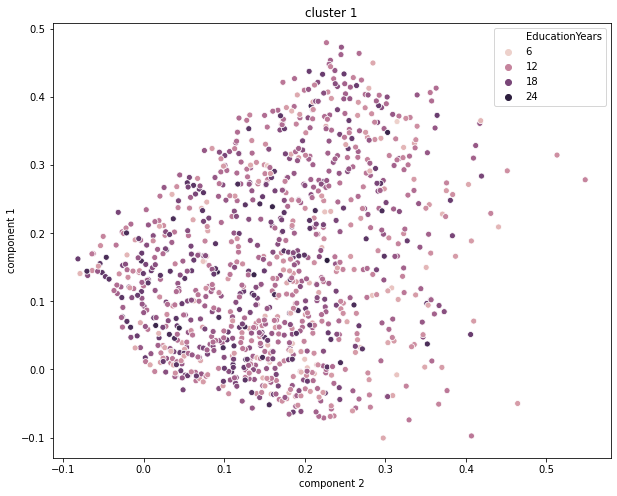

In [321]:
x_axis = df_1['component 2']
y_axis =  df_1['component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_1['EducationYears'])
plt.title('cluster 1')
plt.show()

In [311]:
df_seg_sort['clusters'].unique()

array([0, 1, 2, 3])

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

In [282]:
#sns.pairplot(x_df,hue=,  kind='scatter')

In [ ]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
    for j in range(1,12):
    dbscan_cluster = DBSCAN(eps=i*0.5, min_samples=j)
    clusters=dbscan_cluster.fit_predict(df_norm)
    if len(np.unique(clusters))>=2:
       results=results.append({'Eps':i*0.5,'Min_Samples':j,'Numberof  Cluster':len(np.unique(clusters)),'SilhouetteScore':metrics.silhouette_score(df_norm,clusters),'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)},ignore_index=True)

In [ ]:
parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,21)
results_=pd.DataFrame(columns=['Covariance Type','Number of
Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:       gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
clusters=gmm_cluster.fit_predict(df_norm)
if len(np.unique(clusters))>=2:
results_=results_.append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":metrics.silhouette_score(df_norm,clusters),'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)},ignore_index=True)

In [ ]:
est_bandwidth = estimate_bandwidth(df_norm,quantile=.1,n_samples=10000)
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True).fit(df_norm)
labels_unique=np.unique(mean_shift.labels_)
n_clusters_=len(labels_unique)
print("Number of estimated clusters : %d" % n_clusters_)

In [ ]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=minikm_labels,cmap='Spectral')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')
